Imports

In [1]:
import numpy as np
import umap
from sklearn.cross_decomposition import CCA
from matplotlib import pyplot as plt
from e_machine import distribution_generator, e_machine, weight_initialization, reservoir

c:\Users\aiclu\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Generating inputs

In [51]:
distribution = distribution_generator(num_states=2, num_outputs=2)
sigma, x = e_machine(states=[0.5, -0.5], transition_matrix=distribution, n=10000)

Initializing reservoir and generating hidden states

In [34]:
W, v = weight_initialization(n=1)

In [35]:
# initialize hidden state
h = []
h_t = np.zeros_like(v)
h.append(np.transpose(h_t).tolist()[0])

# pass data through reservoir
for x_t in x:
    h_t = reservoir(h_t, x_t, W, v)
    h.append(np.transpose(h_t).tolist()[0])

In [36]:
# append sigma_t to h_t
r = []
for i, h_t in enumerate(h):
    r.append([sigma[i]]+h_t)


uMAP

In [37]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=1, metric='euclidean')
embedding = reducer.fit_transform(r)

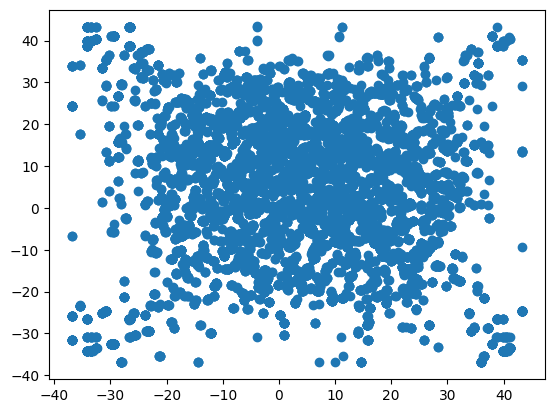

In [38]:
plt.plot(embedding[:-1], embedding[1:], 'o')

CCA

In [39]:
# does not work
# cca = CCA(n_components=1)
# output = cca.fit_transform(X=r)

In [40]:
# attempted cca with r_t as X and r_{t+1} as y
cca = CCA(n_components=1)
# two sets of numbers as output
output = cca.fit_transform(X=r[:-1], y = r[1:])

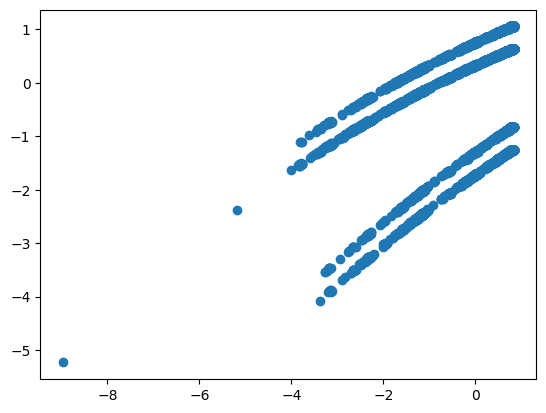

In [41]:
plt.plot(output[0], output[1], 'o')

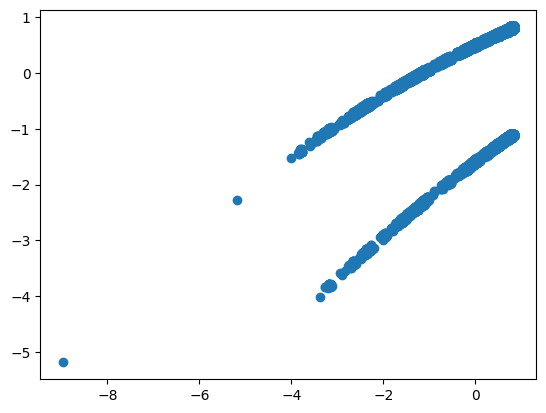

In [42]:
plt.plot(output[0][:-1], output[0][1:], 'o')

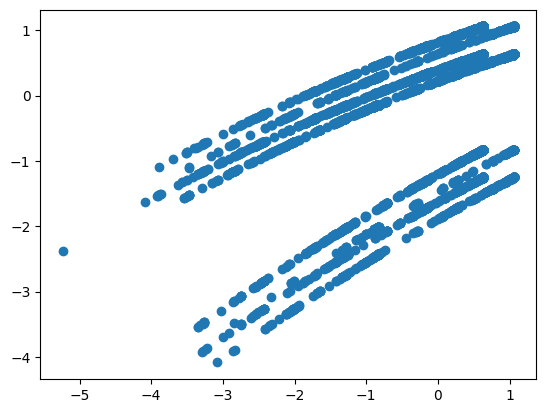

In [43]:
plt.plot(output[1][:-1], output[1][1:], 'o')

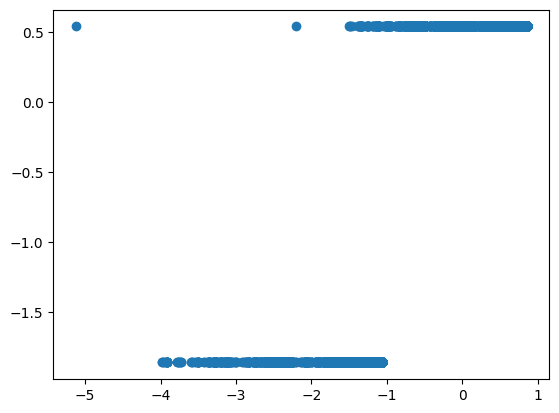

In [44]:
# attempt with X=hidden states and y=outputs
cca = CCA(n_components=1)
output_2 = cca.fit_transform(X=r[1:], y = x)
x1 = [i[0] for i in output_2[0].tolist()]
y1 = [i[0] for i in output_2[1].tolist()]
plt.plot(x1, y1, 'o')


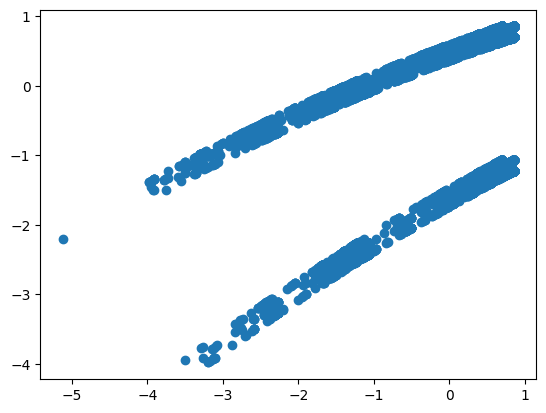

In [45]:
plt.plot(x1[:-1], x1[1:], 'o')


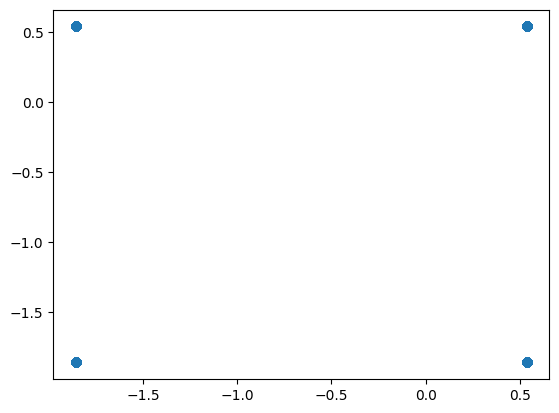

In [46]:
plt.plot(y1[:-1], y1[1:], "o")

tSNE

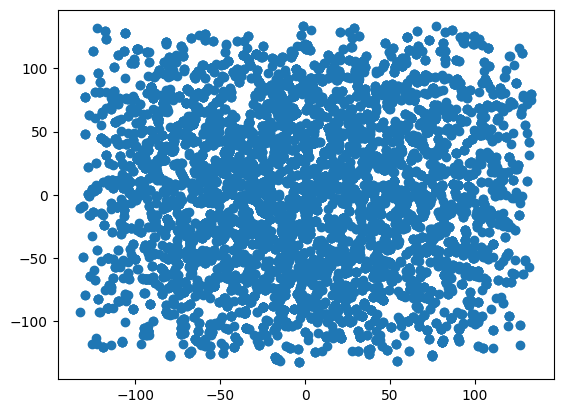

In [47]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=1, learning_rate='auto',
                  init='random', perplexity=3).fit_transform(np.array(r))
plt.plot(X_embedded[:-1], X_embedded[1:], 'o')